running ...
66


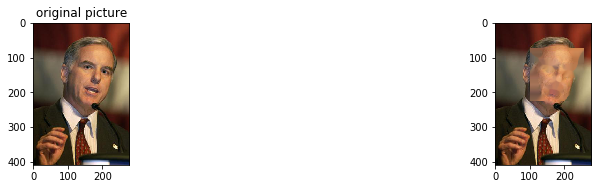

36


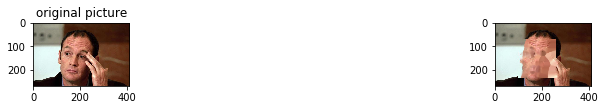

636


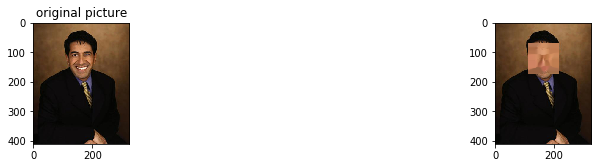

445


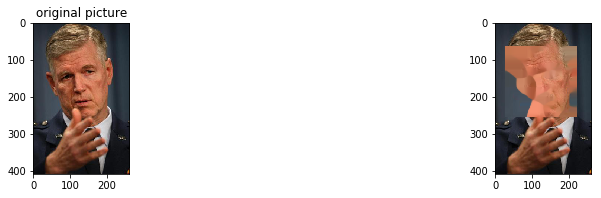

227
811


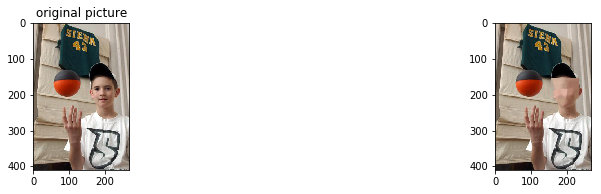

795


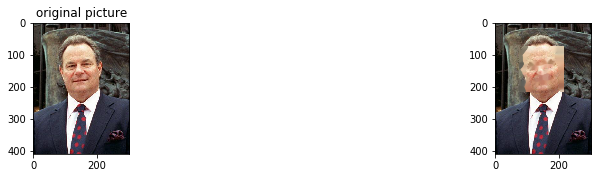

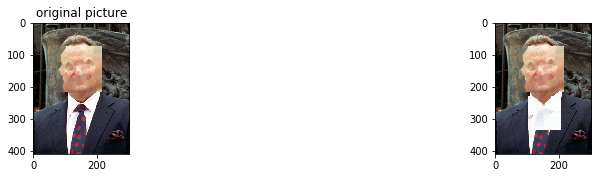

309


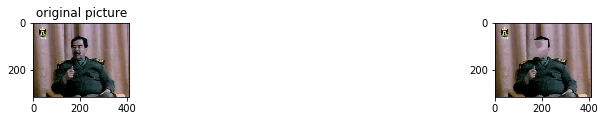

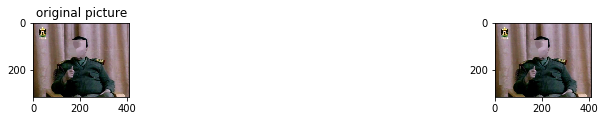

842


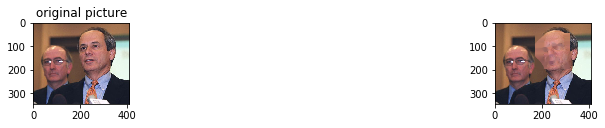

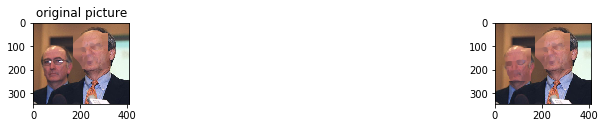

471


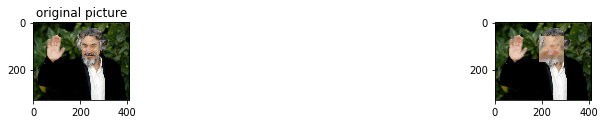

743


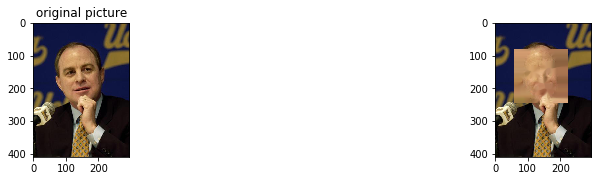

473


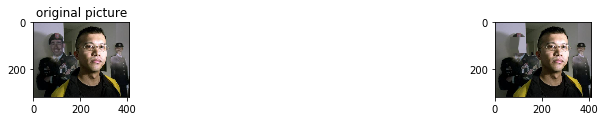

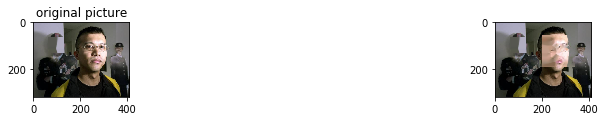

11


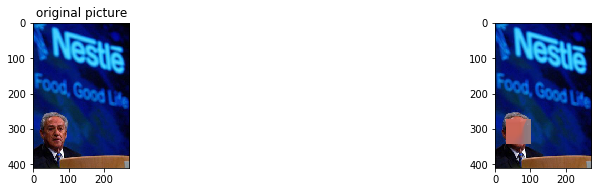

750


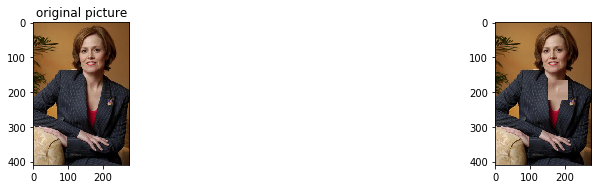

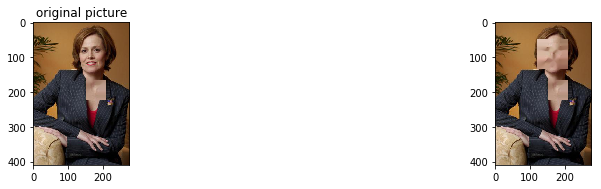

141


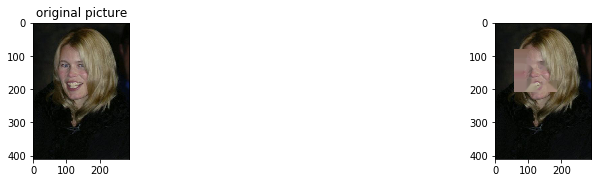

339


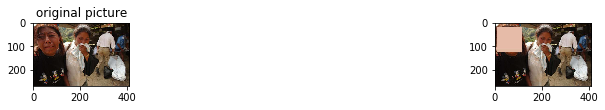

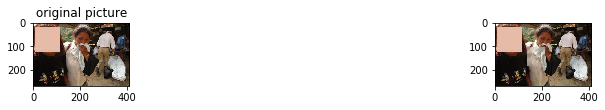

716


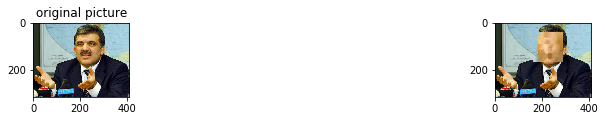

576


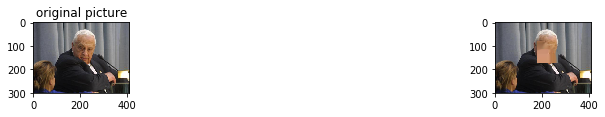

397


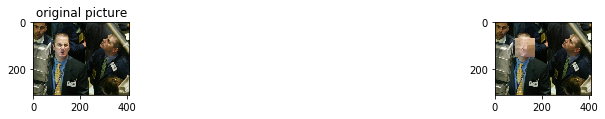

413


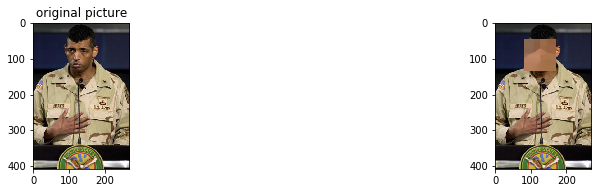

430


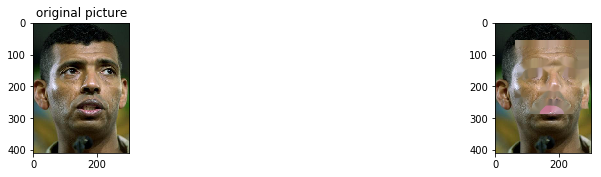

526


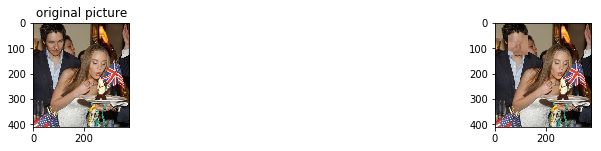

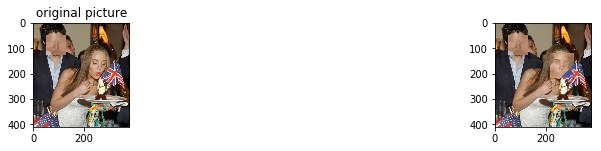

16


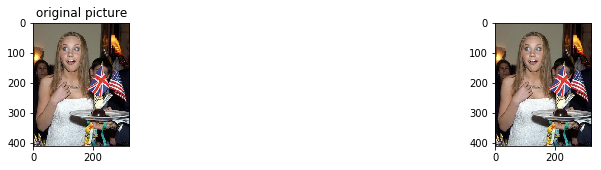

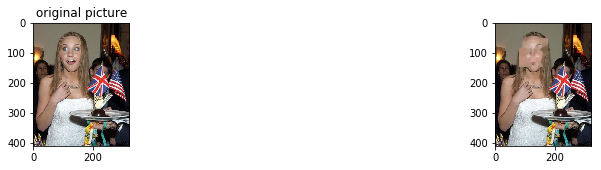

844


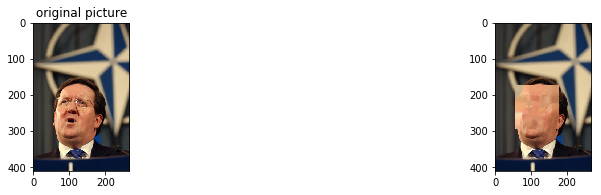

734


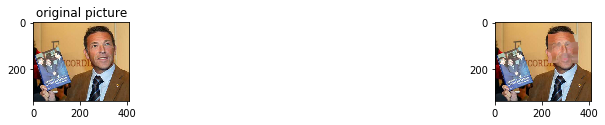

101


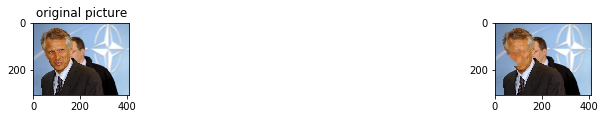

517


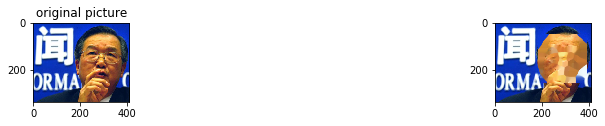

367


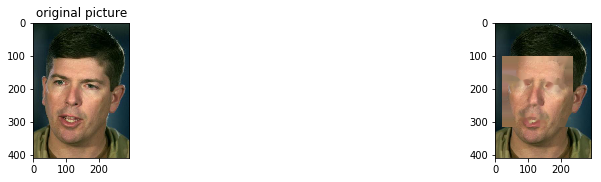

In [2]:
import cv2,os
import numpy as np
from PIL import Image
import pickle
import matplotlib
import matplotlib.pyplot as plt
import random

print("running ...")

recognizer = cv2.face.LBPHFaceRecognizer_create()
cascadePath = "Classifiers/face.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);
path = 'dataset2/originalPics/2003/04/03/big/'
def get_images_and_labels(path):
     lower = np.array([0, 48, 80], dtype = "uint8")
     upper = np.array([20, 255, 255], dtype = "uint8")

     image_paths = [os.path.join(path, f) for f in os.listdir(path)]
     # images will contains face images
     images = []
     # labels will contains the label that is assigned to the image
     labels = []
     for image_path in image_paths:
         # Read the image and convert to grayscale
         image_pil = Image.open(image_path)
         # Convert the image format into numpy array
         image = np.array(image_pil, 'uint8')
         
         # Get the label of the image
         nbr = random.randint(1,1000)#os.path.split(image_path)[1].split(".")[0].replace("face-", "")
         #nbr=int(''.join(str(ord(c)) for c in nbr))
         print nbr
         # Detect the face in the image
         faces = faceCascade.detectMultiScale(image,            
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE)
         # If face is detected, append the face to images and the label to labels
         for (x, y, w, h) in faces:
             maskedImage = image[:]
             images.append(image[y: y + h, x: x + w])
             labels.append(nbr)
             fig = plt.figure(figsize=(10, 30))
             plt.subplot(1, 5, 1)
             #cv2.imshow("Adding faces to traning set...", image)
             # Show the original image
             plt.title("original picture")
             plt.imshow(image,cmap='gray')
  
             
             face_region = image[y: y + h, x: x + w]
             converted = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
             plt.subplot(1, 5, 5)
             maskedImage[y: y + h, x: x + w] = get_inpainted(face_region)
             plt.imshow(maskedImage)
             plt.show()
                
                
             cv2.waitKey(10)
     # return the images list and labels list
     return images, labels

def get_inpainted(img):
    gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gs, 70, 1, cv2.THRESH_BINARY)
    mask_features = 1 - thresh #1 for the dark pixels, 0 everywhere else
    #enlarge the mask a little bit...
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    skinMask = mask_features
    mask_features = cv2.dilate(mask_features, np.ones((8, 8), np.uint8))
    mask_features = cv2.dilate(mask_features, np.ones((8, 8), np.uint8))
    skinMask = cv2.erode(mask_features, kernel, iterations = 5)
    skinMask = cv2.dilate(mask_features, kernel, iterations = 5)
    return cv2.inpaint(img, mask_features, 8, cv2.INPAINT_NS)    
    

images, labels = get_images_and_labels(path)
cv2.waitKey(1)

cv2.destroyAllWindows()

